In [1]:
import pandas as pd

In [2]:
dnase_name=pd.read_csv("configs/data/counts.tomtom_dnase.tsv",sep="\t")
atac_name=pd.read_csv("configs/data/profile.tomtom.tsv",sep="\t")

In [3]:

dnase_dict={}
for i,r in dnase_name.iterrows():
    if "metacluster_0" not in r["Pattern"]:
        continue
    key = r["Pattern"].replace("metacluster_","").replace("pattern_","").replace(".","_")+"_"+r["Match_1"]
    dnase_dict[key] = r["Label"]
    
atac_dict={}
for i,r in atac_name.iterrows():
    if "metacluster_0" not in r["Pattern"]:
        continue

    key = r["Pattern"].replace("metacluster_","").replace("pattern_","").replace(".","_")+"_"+r["Match_1"]
    atac_dict[key] = r["Label"]

In [4]:
dnase_bed="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/K562_05.13.2022_bias_128_4_1234_0.5_fold_0/09_06_2022_motif_scanning/mooods_dir_eith_atac_profile_new/overlaps_resolved_based_on_cwm_activations_normed.bed"
atac_bed="/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/09_06_2022_motif_scanning_profile_new/overlaps_resolved_based_on_cwm_activations_normed.bed"

In [5]:
dnase_hits = pd.read_csv(dnase_bed,sep="\t",header=None)
atac_hits = pd.read_csv(atac_bed,sep="\t",header=None)

In [6]:
atac_hits[3].replace(atac_dict,inplace=True)
dnase_hits[3].replace(atac_dict,inplace=True)

In [7]:
atac_hits = atac_hits.loc[~atac_hits[3].isin(["1_13_SP2_HUMAN.H11MO.0.A", "DIMER", "NA", "GC"])]
dnase_hits = dnase_hits.loc[~dnase_hits[3].isin(["1_13_SP2_HUMAN.H11MO.0.A", "DIMER", "NA", "GC"])]


In [8]:
new_dict={"BACH.1":"AP1","ZN143":"ZNF76","FOSL1+JUN\n":"AP1","BACH":"AP1","JUND":"AP1","CEBPG":"AP1","ETV4":"ELK"}
atac_hits[3].replace(new_dict,inplace=True)
atac_hits.dropna(inplace=True)
dnase_hits[3].replace(new_dict,inplace=True)
dnase_hits.dropna(inplace=True)

In [9]:
all_keys = list(set(atac_hits[3]))
atac_hits['combined'] = atac_hits[[0,1,2]].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
dnase_hits['combined'] = dnase_hits[[0,1,2]].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)


In [102]:
def jaccard(list1, list2):
    list1 = set(list1)
    list2 = set(list2)
    
    intersection = len(list(list1.intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    #print(intersection,union)
    #print(list1.symmetric_difference(list2))
    return [float(intersection) / union,  (len(list2) - intersection)/(len(list1) - intersection),   float(intersection)/len(list2)]

In [103]:
score_dict={}
for key in all_keys:
    #if key != "GATA":
    #    continue
    print(key)
    hits_filt_atac = atac_hits[atac_hits[3]==key]
    hits_filt_dnase = dnase_hits[dnase_hits[3]==key]
    score = jaccard(hits_filt_atac["combined"].tolist(), hits_filt_dnase["combined"].tolist())
    print(score)
    score_dict[key] = score


ELK
[0.3555265963748371, 1.6518475187676709, 0.4696694628771754]
ZBTB33
[0.2755281690140845, 1.017156862745098, 0.42994505494505497]
RFX
[0.3585434173669468, 2.816666666666667, 0.43097643097643096]
ARNTL
[0.2434897395895836, 2.6672484002326935, 0.30677351073480497]
NFYB
[0.548784350993902, 0.7015081379722263, 0.7468340787842862]
TYY1
[0.30998389694041867, 0.9234413965087281, 0.4833984375]
ZNF76
[0.2801185517462352, 1.4846557920928947, 0.39438366978685013]
NFIA
[0.3749306369073309, 4.974071891573365, 0.4187439746591379]
CTCF
[0.5346083597505931, 1.1524419846587046, 0.6820860341779611]
AT
[0.070298769771529, 1.0114068441064639, 0.13071895424836602]
NRF1
[0.3657580919931857, 1.424880590534086, 0.49530913565056905]
GATA
[0.6077376733826061, 3.6990600363856885, 0.6630903065451532]
STA5A
[0.1345575959933222, 2.729496402877698, 0.17521739130434782]
AP1
[0.4430731628706489, 1.8263477134873578, 0.5518054556705859]
REST
[0.29116059379217274, 1.426096997690531, 0.4113441372735939]
HIC
[0.30992755

In [94]:
#dnase_hits.head()

all_keys

['ELK',
 'ZBTB33',
 'RFX',
 'ARNTL',
 'NFYB',
 'TYY1',
 'ZNF76',
 'NFIA',
 'CTCF',
 'AT',
 'NRF1',
 'GATA',
 'STA5A',
 'AP1',
 'REST',
 'HIC',
 'SP1/KLF',
 'FOSL1+JUN']

In [95]:
atac_hits.shape


(347841, 11)

In [96]:
dnase_hits.shape


(429111, 11)

In [107]:
data = pd.read_csv("subfigs/modisco_compare/k562_profile_cwm_enzyme_sim.csv")


In [108]:
motif_enzyme_sim = {}
for i,r in atac_name.iterrows():
    if "metacluster_0" not in r["Pattern"]:
        continue
    key1= r["Pattern"].replace("metacluster_","").replace("pattern_","").replace(".","_")
    key = r["Pattern"].replace("metacluster_","").replace("pattern_","").replace(".","_")+"_"+r["Match_1"]
    if r["Label"] not in motif_enzyme_sim:
        motif_enzyme_sim[r["Label"]] = data[data["key"]==key1]["Tn5-sim"].values[0]-data[data["key"]==key1]["DNASE-sim"].values[0]

In [109]:
x=[]
y=[]
names=[]
for key in motif_enzyme_sim:
    if key in score_dict:
        names.append(key)
        x.append(motif_enzyme_sim[key])
        y.append(score_dict[key][0])
        print(key,motif_enzyme_sim[key],score_dict[key][0])
        
    

CTCF 0.1634374710299435 0.5346083597505931
SP1/KLF 0.14903067946546206 0.4781528166929416
GATA -0.13398579321231247 0.6077376733826061
NFYB -0.07283526101906851 0.548784350993902
ELK 0.01669449081803015 0.3555265963748371
ARNTL -0.035066162570888404 0.2434897395895836
NRF1 -0.09913700107874868 0.3657580919931857
FOSL1+JUN -0.08759625962596262 0.38514559009706006
TYY1 0.051091115937532294 0.30998389694041867
NFIA 0.007749712973593503 0.3749306369073309
ZNF76 0.13392857142857137 0.2801185517462352
ZBTB33 0.009039548022598931 0.2755281690140845
RFX -0.12096774193548387 0.3585434173669468
REST 0.1071428571428572 0.29116059379217274
STA5A 0.0568345323741008 0.1345575959933222
AT -0.011688311688311692 0.070298769771529
HIC -0.12 0.3099275567606945


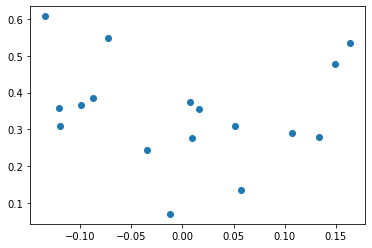

In [110]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [111]:
import scipy.stats
scipy.stats.pearsonr(x,y)

(-0.10857093566987061, 0.6783015408967863)